In [1]:
# import libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
# reading csv file
movie=pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT CSV/my_movies.csv")
movie.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [4]:
movie.shape

(10, 15)

In [5]:
movie= movie.iloc[:, 5:]

In [6]:
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Apriori Algorithm

##### apriori algorithm with  min support= 0.05 and lenghth of itemset=3

In [7]:
frequent_movieset=apriori(movie, min_support=0.05, max_len=3 ,use_colnames=True)
frequent_movieset

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


#### we got 45 combinations with min support of 0.05

## Association Rules

#### Creating rules with confidence threshold =0.5

In [8]:
rules = association_rules(frequent_movieset, metric='confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
105,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
106,"(LOTR2, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
107,(Harry Potter1),"(LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
108,(LOTR2),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


#### with confidence threshhold value 0.5 we got 110 rules

In [9]:
rules.sort_values('confidence',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,"(Sixth Sense, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
39,(LOTR),"(Gladiator, Sixth Sense)",0.1,0.5,0.1,1.0,2.000000,0.05,inf
78,"(Gladiator, Braveheart)",(Patriot),0.1,0.6,0.1,1.0,1.666667,0.04,inf
77,(LOTR),"(Green Mile, Sixth Sense)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
30,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
75,"(Sixth Sense, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
33,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf
74,"(Green Mile, LOTR)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
69,"(LOTR2, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
68,"(LOTR2, Green Mile)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf


In [10]:
rules[rules.confidence>0.9].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
8,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
10,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
11,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
12,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
16,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
17,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
22,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
26,(Braveheart),(Patriot),0.1,0.6,0.1,1.0,1.666667,0.04,inf
30,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf


Text(0.5, 1.0, 'Most popular movie')

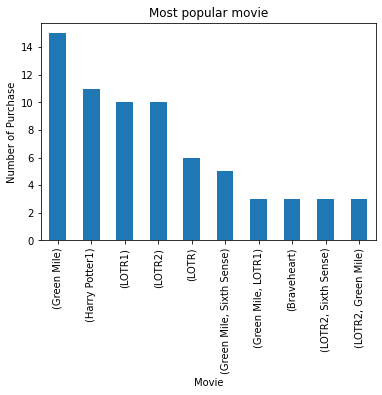

In [11]:
fig, ax=plt.subplots(figsize=(6, 4))
rules['antecedents'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Movie')
plt.ylabel('Number of Purchase')
plt.title('Most popular movie')

Text(0.5, 1.0, 'Most popular movie')

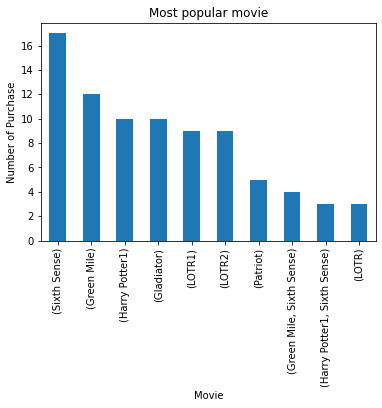

In [12]:
fig, ax=plt.subplots(figsize=(6, 4))
rules['consequents'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Movie')
plt.ylabel('Number of Purchase')
plt.title('Most popular movie')

#### from the above graph it is clear that sisth sense movie is most popular one

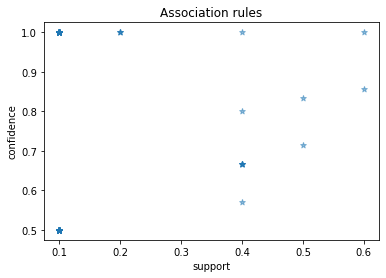

In [13]:
plt.scatter(rules.support, rules.confidence, alpha=0.5, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Association rules')
plt.show()

## apriori algorithm with min support=0.1 and length of itemset =2

In [14]:
frequent_movieset1= apriori(movie, min_support=0.1, max_len=2, use_colnames=True)
frequent_movieset1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


### we got 29 combination of movieset with min support of 0.1 and itemset len of=2

## Association Rules

In [16]:
## Creating rules with confidence threshold 0.8
rules_1= association_rules(frequent_movieset1, metric='confidence', min_threshold=0.7)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


#### with min threshold value of 0.7 we get 12 rules

Text(0.5, 1.0, 'Most popular Movie')

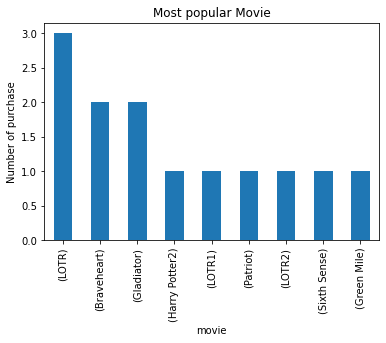

In [19]:
fig, ax=plt.subplots(figsize=(6, 4))
rules_1['antecedents'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('movie')
plt.ylabel('Number of purchase')
plt.title('Most popular Movie')

Text(0.5, 1.0, 'Most popular Movie')

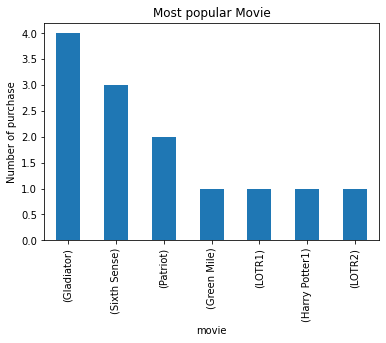

In [20]:
fig, ax=plt.subplots(figsize=(6, 4))
rules_1['consequents'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('movie')
plt.ylabel('Number of purchase')
plt.title('Most popular Movie')

##### from the above ghraph it is clear that gadiator movie is most popular one for threshold value of=0.7

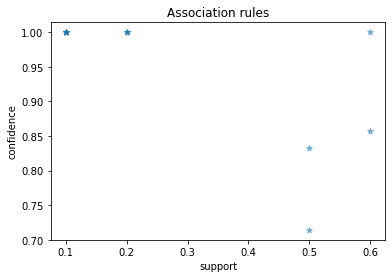

In [21]:
plt.scatter(rules_1.support, rules_1.confidence, alpha=0.5, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Association rules')
plt.show()